# **Amazon Sales Dataset - EDA Notebook**

**Objective**: Comprehensive Exploratory Data Analysis with Statistical Tests, Advanced Visualizations & Data Storytelling

**Dataset**: Amazon Product Ratings & Reviews Clean (1,351 products)

**Analysis Components**:
- Descriptive & Inferential Statistics
- Relationship & Correlation Analysis
- Advanced Data Visualization

<p style="font-family:newtimeroman;font-size:150%;text-align:center;color:#06445e;">PHÂN TÍCH DỮ LIỆU KHÁM PHÁ (EXPLORATORY DATA ANALYSIS - EDA)</p>

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [4]:
processed_file_path = '../data/processed/amazon.csv'
df = pd.read_csv(processed_file_path)
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_title_clean,about_product_clean,review_length,review_word_count,price_difference,discount_amount,product_type,category_main,is_popular,rating_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"satisfied,charging is really fast,value for mo...",high compatibility : compatible with iphone 12...,394,60,700.0,700.0,USBCables,Computers&Accessories,1,Excellent
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,"a good braided cable for your type c device,go...","compatible with all type c enabled devices, be...",1186,201,150.0,150.0,USBCables,Computers&Accessories,1,Good
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"good speed for earlier versions,good product,w...",【 fast charger& data sync】-with built-in safet...,88,13,1700.0,1700.0,USBCables,Computers&Accessories,0,Good
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"good product,good one,nice,really nice product...",the boat deuce usb 300 2 in 1 cable is compati...,443,77,370.0,370.0,USBCables,Computers&Accessories,1,Excellent
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"as good as original,decent,good one for second...",[charge & sync function]- this cable comes wit...,2451,415,245.0,245.0,USBCables,Computers&Accessories,1,Excellent


In [5]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1351 non-null   object 
 1   product_name          1351 non-null   object 
 2   category              1351 non-null   object 
 3   discounted_price      1351 non-null   float64
 4   actual_price          1351 non-null   float64
 5   discount_percentage   1351 non-null   float64
 6   rating                1351 non-null   float64
 7   rating_count          1351 non-null   int64  
 8   about_product         1351 non-null   object 
 9   user_id               1351 non-null   object 
 10  user_name             1351 non-null   object 
 11  review_id             1351 non-null   object 
 12  review_title          1351 non-null   object 
 13  review_content        1351 non-null   object 
 14  img_link              1351 non-null   object 
 15  produc

<h1 align="center"><span style="color:#06445e;">Thống kê mô tả (Descriptive Statistics)</span>


In [6]:
# Descriptive statistics for numerical columns
print("DESCRIPTIVE STATISTICS - NUMERICAL COLUMNS")
df.describe().T

DESCRIPTIVE STATISTICS - NUMERICAL COLUMNS


,count,mean,std,min,25%,50%,75%,max
discounted_price,1351.0,3304.801754,7173.975455,39.0,349.00,899.00,2174.00,77990.00
actual_price,1351.0,5691.176625,11218.666235,39.0,899.00,1795.00,4575.00,139900.00
discount_percentage,1351.0,0.466854,0.216326,0.0,0.31,0.49,0.62,0.94
rating,1351.0,4.091858,0.297334,2.0,3.90,4.10,4.30,5.00
rating_count,1351.0,17618.373797,42119.882419,0.0,1094.50,4736.00,15995.00,426973.00
review_length,1351.0,1387.356033,1824.956221,67.0,473.50,800.00,1400.00,18507.00
review_word_count,1351.0,242.002961,317.128608,11.0,80.00,138.00,246.00,2974.00
price_difference,1351.0,2386.374870,4736.438908,0.0,380.00,801.00,2000.00,61910.00
discount_amount,1351.0,2386.374870,4736.438908,0.0,380.00,801.00,2000.00,61910.00
is_popular,1351.0,0.250185,0.433280,0.0,0.00,0.00,0.50,1.00


In [7]:
# Descriptive statistics for categorical columns
print("DESCRIPTIVE STATISTICS - CATEGORICAL COLUMNS")
df.describe(include='object').T

DESCRIPTIVE STATISTICS - CATEGORICAL COLUMNS


,count,unique,top,freq
product_id,1351,1351,B07JW9H4J1,1
product_name,1351,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1351,211,Computers&Accessories|Accessories&Peripherals|...,161
about_product,1351,1290,Upto 12GB RAM with RAM Plus | 128GB internal m...,4
user_id,1351,1186,"AGAELRYPMTG5SADZPDYB343EASAA,AGFN4JODOM2NTFCJQ...",8
user_name,1351,1186,"Satheesh Kadiam,Pritom Chakraborty,Vishwa,Simr...",8
review_id,1351,1186,"R2K5OD0MEEBTDL,RS1N6TNO33BOK,R6KWBGOKI1N9Y,R30...",8
review_title,1351,1186,"Phone, camera, heating - works for me, may not...",8
review_content,1351,1199,"I am not big on camera usage, personally. I wa...",8
img_link,1351,1322,https://m.media-amazon.com/images/I/413sCRKobN...,3


<h1 align="center"><span style="color:#06445e;">2. PHÂN TÍCH ĐƠN BIẾN</span>


<h2 align="center"><span style="color:#06445e;">2.1. Phân tích các biến số</span>


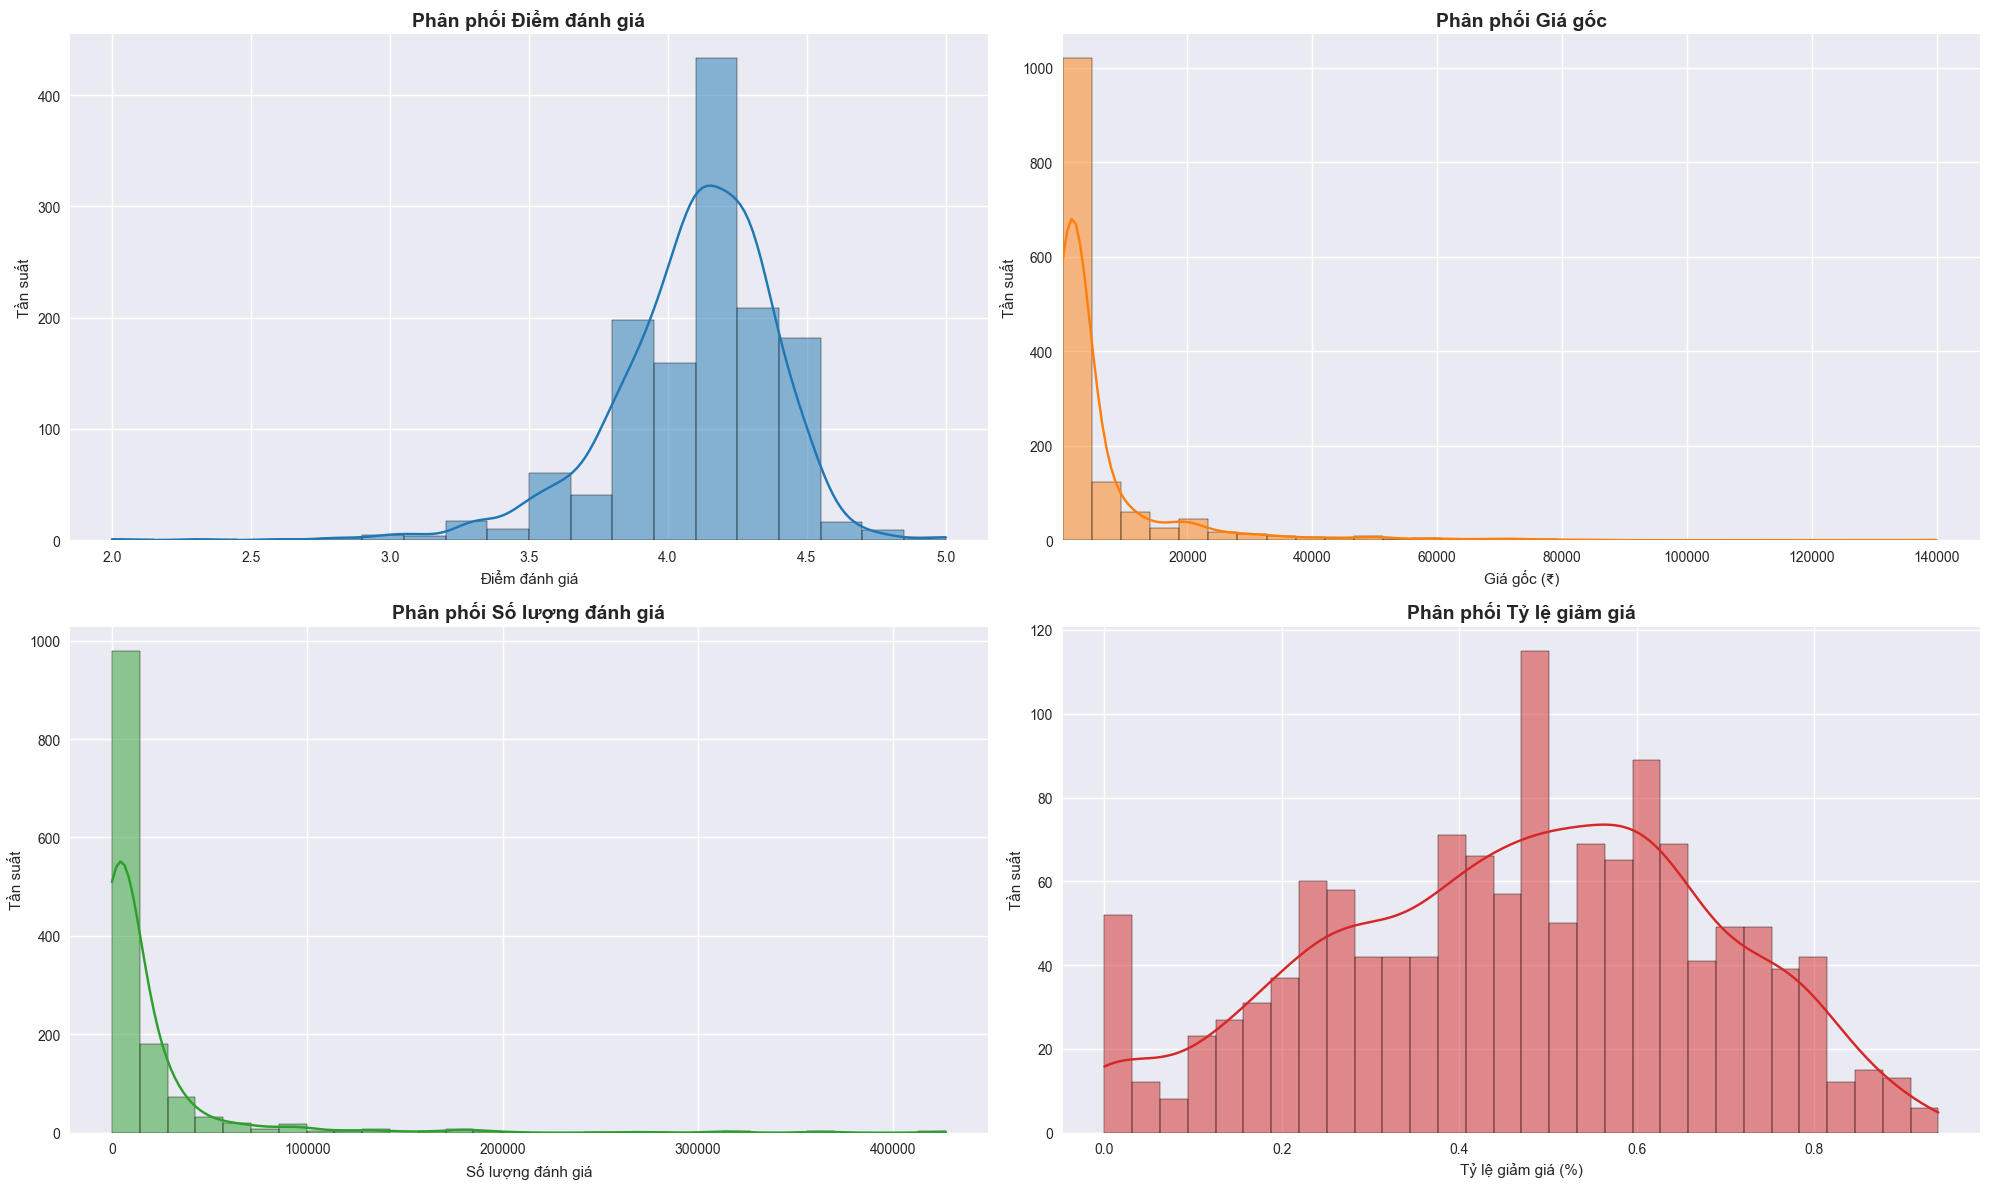

In [22]:
# Create subplots for numerical variables distribution
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Rating distribution
sns.histplot(data=df, x='rating', kde=True, ax=axes[0,0], color='#1f77b4', bins=20)
axes[0,0].set_title('Phân phối Điểm đánh giá', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Điểm đánh giá')
axes[0,0].set_ylabel('Tần suất')

# Actual price distribution
sns.histplot(data=df, x='actual_price', kde=True, ax=axes[0,1], color='#ff7f0e', bins=30)
axes[0,1].set_title('Phân phối Giá gốc', fontsize=14, fontweight='bold')
axes[0,1].set_xlim(left=39) 
axes[0,1].set_xlabel('Giá gốc (₹)')
axes[0,1].set_ylabel('Tần suất')

# Rating count distribution
sns.histplot(data=df, x='rating_count', kde=True, ax=axes[1,0], color='#2ca02c', bins=30)
axes[1,0].set_title('Phân phối Số lượng đánh giá', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Số lượng đánh giá')
axes[1,0].set_ylabel('Tần suất')

# Discount percentage distribution
sns.histplot(data=df, x='discount_percentage', kde=True, ax=axes[1,1], color='#d62728', bins=30)
axes[1,1].set_title('Phân phối Tỷ lệ giảm giá', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Tỷ lệ giảm giá (%)')
axes[1,1].set_ylabel('Tần suất')

plt.tight_layout()
plt.show()

**1. Phân phối Điểm đánh giá**
- **Đánh giá sản phẩm tập trung ở khoảng 4.0-4.2 điểm (mode).** Đây là một điểm rất tích cực, cho thấy phần lớn các sản phẩm trong bộ dữ liệu này đáp ứng được hoặc vượt qua kỳ vọng của người mua.
- **Phần lớn sản phẩm (khoảng 80%) nằm trong range 3.8-4.6 điểm.** Điều này tạo ra một mức độ tin cậy cao cho người mua khi lướt qua các sản phẩm trong tập dữ liệu. Tuy nhiên, nó cũng làm cho việc phân biệt giữa một sản phẩm "tốt" và một sản phẩm "xuất sắc" trở nên khó khăn hơn chỉ dựa vào điểm số.
- **Phân phối lệch trái với tail dài phía thấp → nhiều sản phẩm được đánh giá cao hơn là được đánh giá thấp.** Điều này cho thấy chất lượng chung của các sản phẩm trong bộ dữ liệu là tốt. Các sản phẩm có đánh giá rất thấp (dưới 3.5) có thể đã bị người bán gỡ bỏ hoặc không thu hút được nhiều lượt mua và đánh giá, một cơ chế tự lọc của thị trường.

**2. Phân phối Giá gốc**
- **Phần lớn sản phẩm có giá gốc rất thấp, tập trung chủ yếu trong khoảng 0 - 20.000₫.** Điều này cho thấy bộ dữ liệu này có thể đang tập trung vào một phân khúc thị trường cụ thể, có thể là các mặt hàng tiêu dùng nhanh, phụ kiện nhỏ hoặc các sản phẩm giá rẻ.
- **Phân phối lệch phải mạnh với một tail rất dài.** Có một số ít sản phẩm có giá gốc cao hơn hẳn so với phần còn lại, lên tới 140.000₫. Những sản phẩm này có thể là các mặt hàng đặc thù, có giá trị cao hơn hoặc thuộc một danh mục khác biệt so với đa số trong bộ dữ liệu.
- **Khoảng giá trải rộng nhưng bị chi phối bởi các sản phẩm giá rẻ.** Điều này có nghĩa là giá trị trung bình (mean) sẽ bị kéo lên bởi các sản phẩm đắt tiền hiếm, trong khi giá trị trung vị (median) sẽ phản ánh tốt hơn mức giá phổ biến nhất trong tập dữ liệu này.

**3. Phân phối Số lượng đánh giá**
- **Đa số áp đảo các sản phẩm có rất ít lượt đánh giá, tập trung gần 0.** Điều này cho thấy trong bộ dữ liệu này, nhiều sản phẩm có thể là mới, chưa thu hút được sự chú ý của người mua, hoặc thuộc các danh mục ít phổ biến.
- **Phân phối lệch phải cực mạnh, cho thấy sự tồn tại của các "sản phẩm chủ lực".** Một số ít sản phẩm có số lượng đánh giá rất cao (lên tới gần 400.000), cho thấy chúng rất phổ biến và được nhiều người mua tin dùng. Điều này tạo ra một sự phân hóa rõ rệt giữa các sản phẩm phổ biến và các sản phẩm còn lại.
- **Số lượng đánh giá không phải là thước đo chất lượng cho phần lớn sản phẩm, mà là thước đo mức độ phổ biến.** Người mua không thể dùng số lượng đánh giá để đánh giá chất lượng của một sản phẩm có ít review, nhưng có thể tin tưởng vào sự phổ biến của những sản phẩm có hàng trăm ngàn lượt đánh giá.

**4. Phân phối Tỷ lệ giảm giá**
- **Hầu hết sản phẩm đều có mức giảm giá đáng kể, tập trung trong khoảng 0.4 - 0.6 (40% - 60%).** Điều này cho thấy trong bộ dữ liệu này, việc áp dụng giảm giá là một chiến lược định giá rất phổ biến, có thể để thu hút khách hàng hoặc đẩy nhanh hàng tồn kho.
- **Rất hiếm sản phẩm được bán với giá gốc hoặc giảm giá nhẹ.** Điều này ngụ ý rằng các nhà bán hàng trong tập dữ liệu này có xu hướng "tất tay" với các chương trình khuyến mãi lớn thay vì các đợt giảm giá nhỏ lẻ.
- **Tỷ lệ giảm giá là một yếu tố định giá quan trọng.** Người mua khi xem xét các sản phẩm trong bộ dữ liệu này có thể đã kỳ vọng một mức giảm giá lớn, và giá niêm yết (giá gốc) có thể chỉ mang tính tham khảo.

<h2 align="center"><span style="color:#06445e;">2.2. Phân tích các biến phân loại</span>


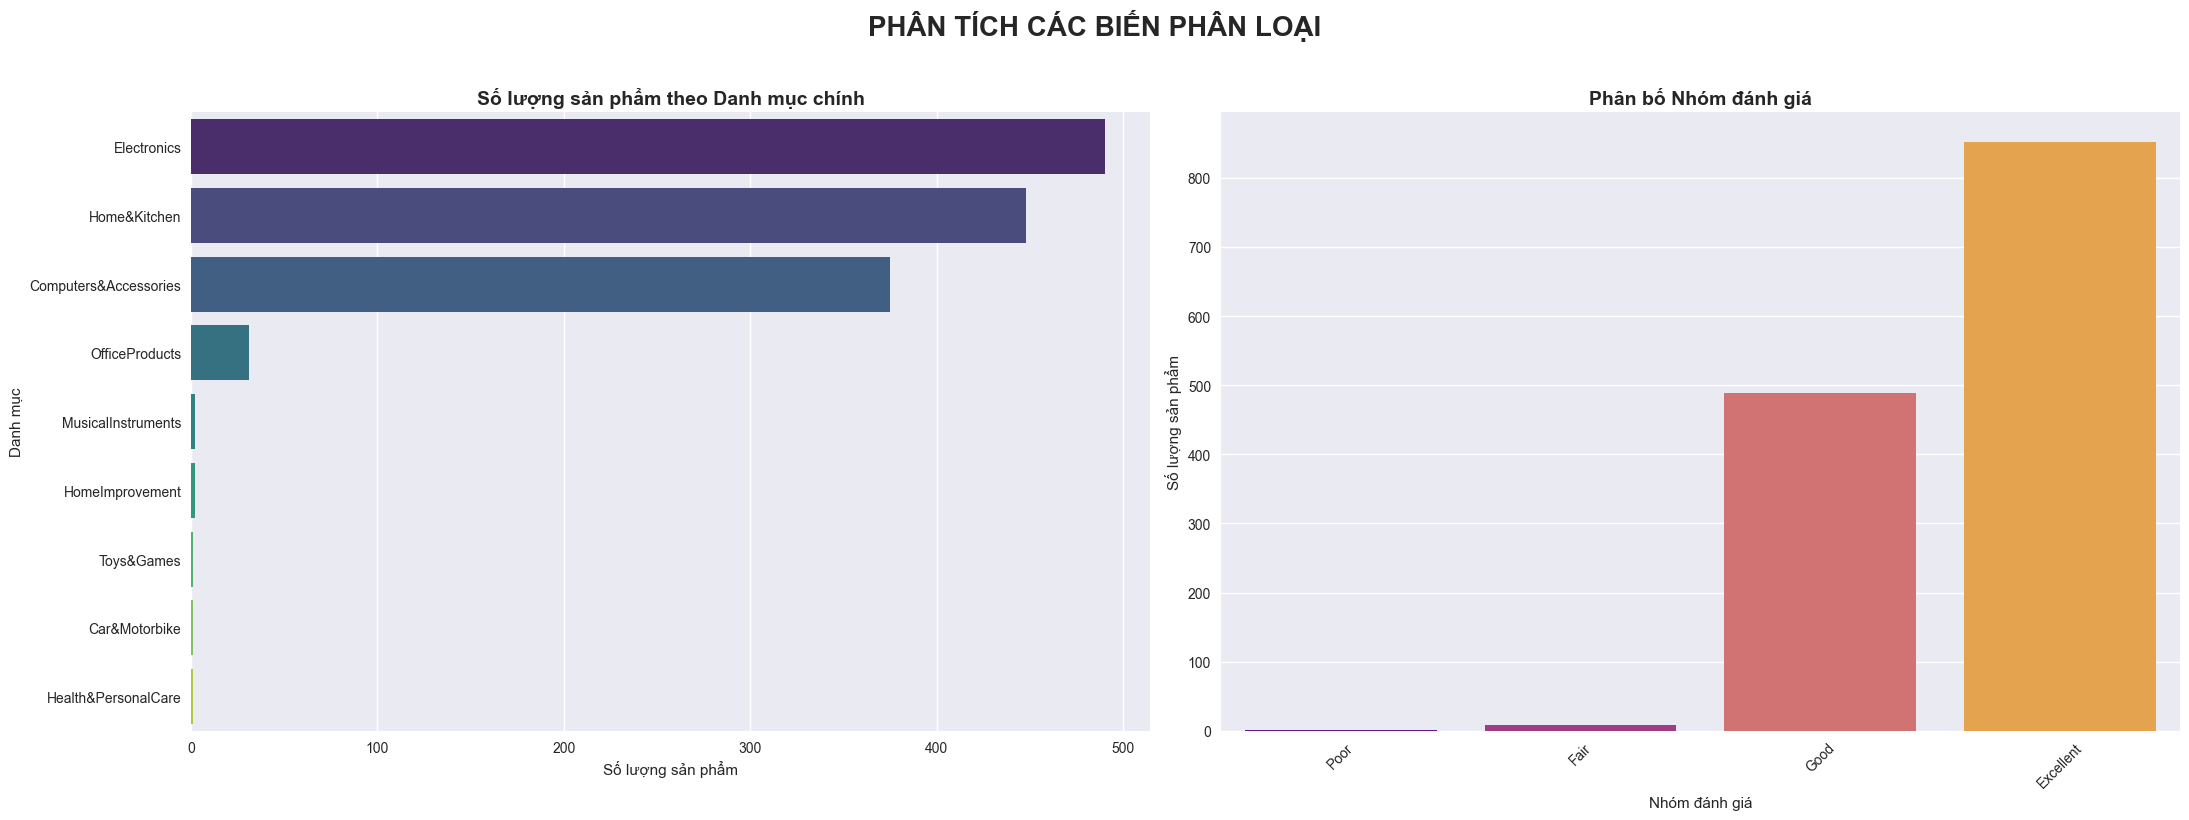

In [9]:
# Create subplots for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
fig.suptitle('PHÂN TÍCH CÁC BIẾN PHÂN LOẠI', fontsize=20, fontweight='bold', y=1.02)

# Main category distribution
category_counts = df['category_main'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index, ax=axes[0], palette='viridis')
axes[0].set_title('Số lượng sản phẩm theo Danh mục chính', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Số lượng sản phẩm')
axes[0].set_ylabel('Danh mục')

# Rating category distribution
rating_order = ['Poor', 'Fair', 'Good', 'Excellent']
rating_counts = df['rating_category'].value_counts().reindex(rating_order)
sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=axes[1], palette='plasma')
axes[1].set_title('Phân bố Nhóm đánh giá', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Nhóm đánh giá')
axes[1].set_ylabel('Số lượng sản phẩm')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**5. Phân bổ Số lượng sản phẩm theo Danh mục chính**
- **Electronics là danh mục chiếm ưu thế tuyệt đối trong bộ dữ liệu.** Số lượng sản phẩm trong danh mục này vượt trội hơn hẳn so với tất cả các danh mục còn lại. Điều này cho thấy bộ dữ liệu có thể được thu thập từ một chiến dịch hoặc một trang kết quả tìm kiếm cụ thể tập trung sâu vào lĩnh vực điện tử tiêu dùng.
- **Nhóm 'Điện tử & Gia dụng' (Electronics, Home&Kitchen, Computers&Accessories) chiếm phần lớn danh mục sản phẩm.** Sự tập trung vào ba nhóm này phản ánh một trong những phân khúc mua sắm trực tuyến lớn và phổ biến nhất, nơi người mua thường có xu hướng mua sắm các sản phẩm liên quan với nhau.
- **Tồn tại một "đuôi dài" của các danh mục nhỏ lẻ với rất ít sản phẩm.** Các danh mục như Office Products, Toys&Games, và Others chỉ chiếm một tỷ trọng không đáng kể. Điều này nhấn mạnh thêm rằng bộ dữ liệu không phải là một mẫu đại diện cho toàn bộ Amazon, mà là một lát cắt chuyên sâu vào một vài lĩnh vực chính.

**6. Phân bố Nhóm đánh giá**
- **Phần lớn áp đảo các sản phẩm nhận được đánh giá "Xuất sắc" (Excellent).** Điều này củng cố nhận định từ biểu đồ điểm đánh giá: chất lượng sản phẩm được cảm nhận rất cao trong bộ dữ liệu này. Người mua có xu hướng rất hài lòng với các sản phẩm họ đã mua trong tập hợp này.
- **Có một khoảng cách lớn giữa nhóm "Xuất sắc" và "Tốt" (Good).** Số lượng sản phẩm được đánh giá là "Tốt" ít hơn đáng kể so với "Xuất sắc". Điều này có thể cho thấy người mua có xu hướng chỉ để lại đánh giá khi họ thực sự bị thuyết phục, hoặc các sản phẩm trong tập dữ liệu này thực sự có một lợi thế cạnh tranh rõ rệt.
- **Các đánh giá tiêu cực ("Kém" - Poor và "Trung bình" - Fair) gần như không có.** Sự vắng mặt gần như hoàn toàn của các đánh giá thấp là một chỉ báo rất mạnh mẽ. Nó có thể là kết quả của việc bộ dữ liệu chỉ bao gồm các sản phẩm đã được sàng lọc (ví dụ: best-sellers) hoặc là một minh chứng cho việc các danh mục được thể hiện (chủ yếu là Electronics) có các tiêu chuẩn chất lượng rất cao và các cơ chế loại bỏ sản phẩm kém chất lượng hiệu quả.

<h1 align="center"><span style="color:#06445e;">3. PHÂN TÍCH ĐA BIẾN</span>


<h2 align="center"><span style="color:#06445e;">3.1. Ma trận tương quan</span>


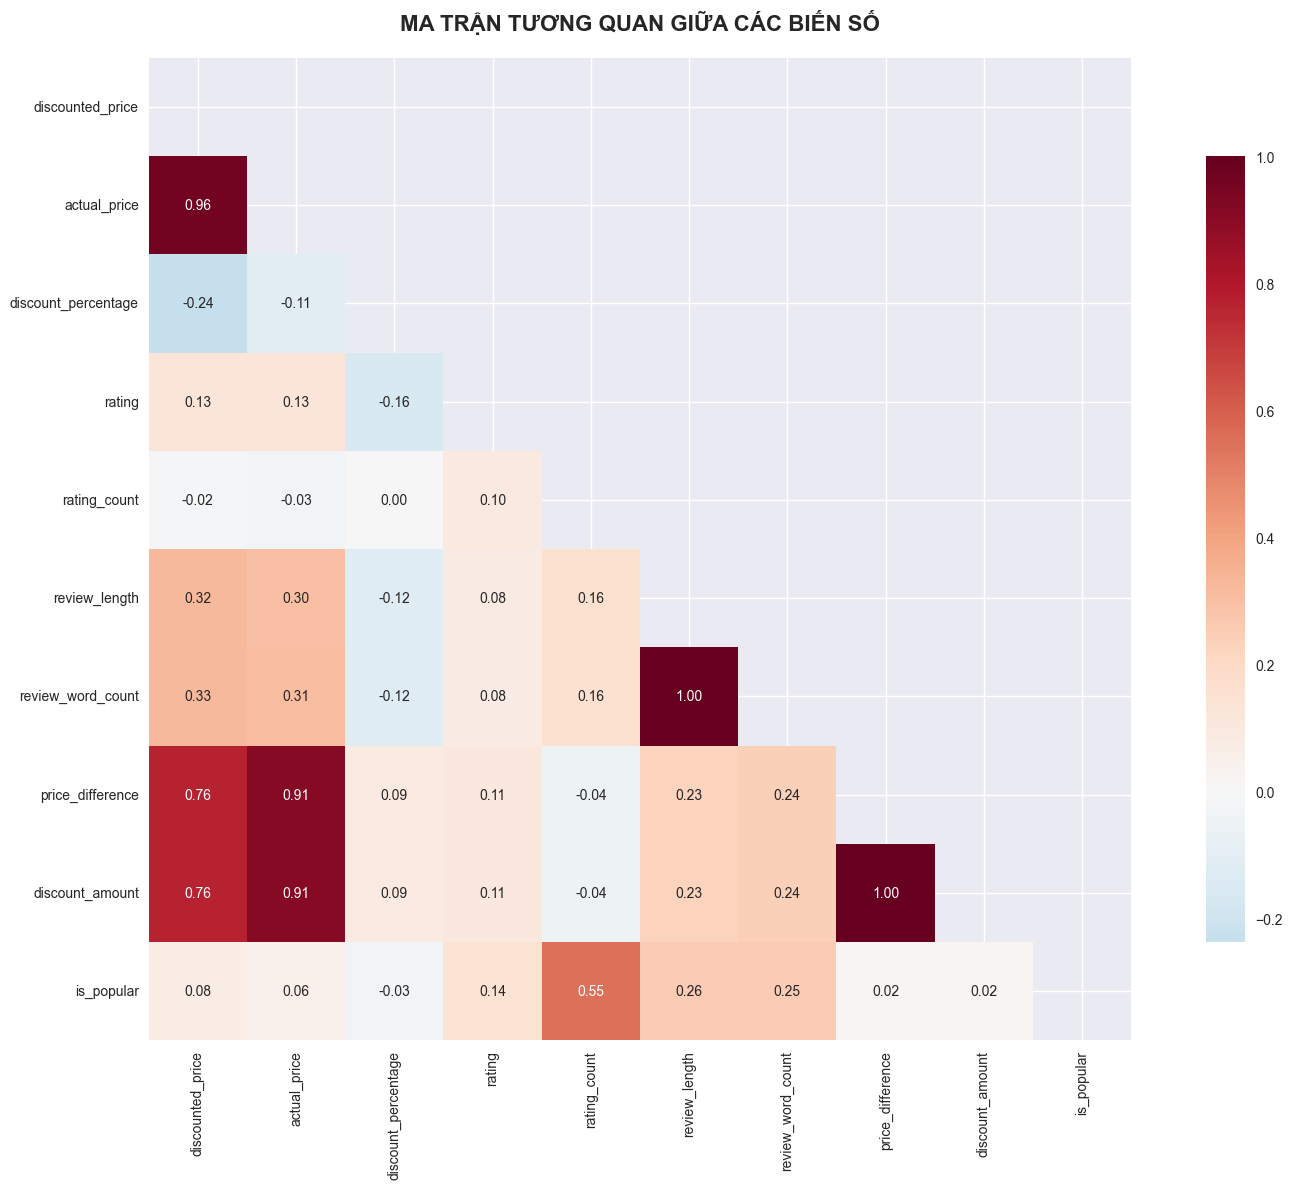

In [10]:
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN SỐ', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

**7. Phân tích Mối tương quan giữa các biến số**
- **Mối tương quan mạnh nhất là giữa Giá gốc (`actual_price`) và Giá đã giảm (`discounted_price`) với hệ số 0.96.** Điều này cho thấy trong bộ dữ liệu này, việc giảm giá được áp dụng một cách nhất quán theo tỷ lệ phần trăm. Sản phẩm đắt tiền hơn sẽ có mức giảm giá tuyệt đối cao hơn, nhưng tỷ lệ giảm có thể không khác biệt nhiều so với các sản phẩm rẻ hơn. Nói cách khác, giá gốc là một yếu tố dự báo gần như hoàn hảo cho giá cuối cùng.
- **Giá cả (cả gốc và đã giảm) gần như không có mối tương quan với Điểm đánh giá (`rating`).** Điều này cho thấy trong bộ dữ liệu này, người mua không mặc định rằng "đắt hơn là tốt hơn". Chất lượng cảm nhận (được thể hiện qua điểm số) không phụ thuộc vào mức giá. Một sản phẩm giá rẻ có thể nhận được đánh giá cao ngang ngửa một sản phẩm đắt tiền, và ngược lại. Điều này nhấn mạnh rằng người mua trong tập dữ liệu này tập trung vào giá trị và chất lượng thực tế của sản phẩm, chứ không phải là giá niêm yết.
- **Có một mối tương quan nghịch nhẹ và đáng chú ý giữa Điểm đánh giá (`rating`) và Số lượng đánh giá (`rating_count`).** Điều này trái với suy nghĩ thông thường rằng sản phẩm tốt nhất sẽ có nhiều đánh giá nhất. Trong bộ dữ liệu này, có thể các sản phẩm có điểm số hơi thấp hơn (ví dụ 3.8-4.0) lại thu hút nhiều người mua hơn, dẫn đến số lượng đánh giá cao hơn. Trong khi đó, các sản phẩm đạt điểm gần như hoàn hảo (4.5+) có thể thuộc một thị trường ngách, có lượng người mua ít hơn nhưng rất trung thành.

<h2 align="center"><span style="color:#06445e;">3.2. Mối quan hệ giữa Rating và Giá</span>


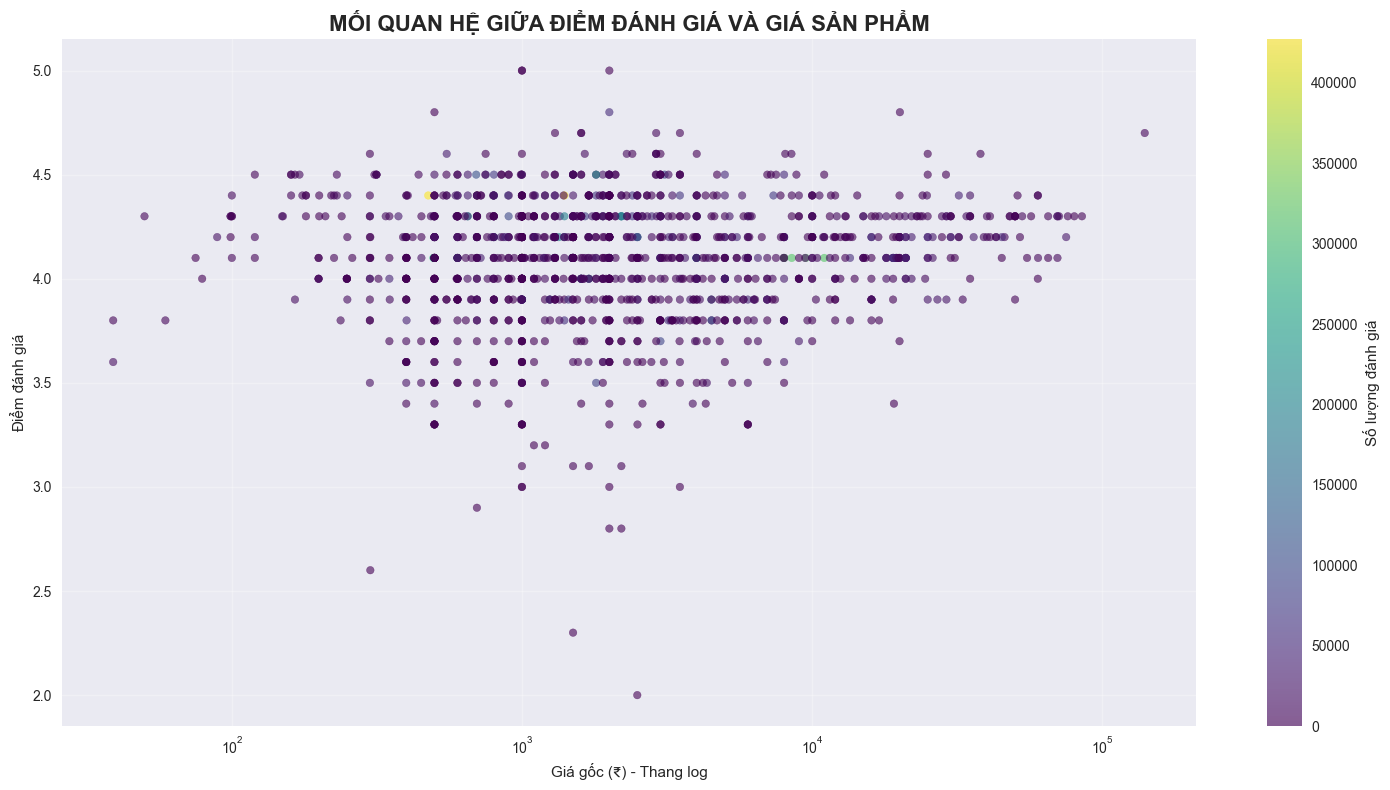

In [11]:
plt.figure(figsize=(15, 8))

# Create scatter plot with transparency
scatter = plt.scatter(df['actual_price'], df['rating'], 
                     c=df['rating_count'], cmap='viridis', 
                     alpha=0.6, s=30)
plt.colorbar(scatter, label='Số lượng đánh giá')
plt.xscale('log') 

plt.title('MỐI QUAN HỆ GIỮA ĐIỂM ĐÁNH GIÁ VÀ GIÁ SẢN PHẨM', fontsize=16, fontweight='bold')
plt.xlabel('Giá gốc (₹) - Thang log')
plt.ylabel('Điểm đánh giá')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**8. Mối quan hệ giữa Điểm đánh giá, Giá sản phẩm và Số lượng đánh giá**
- **Giá cả không phải là yếu tố quyết định đến điểm đánh giá.** Trên biểu đồ, các sản phẩm có giá gốc từ thấp đến cao (trên trục hoành log) đều có thể đạt được điểm đánh giá trong khoảng phổ biến (3.8 - 4.6). Điều này cho thấy trong bộ dữ liệu này, người mua đánh giá chất lượng sản phẩm một cách độc lập tương đối với giá cả. Một sản phẩm đắt tiền không tự động nhận được đánh giá cao hơn một sản phẩm giá rẻ.
- **Các sản phẩm phổ biến nhất (có nhiều đánh giá nhất) tập trung ở phân khúc giá tầm trung và có điểm đánh giá tốt.** Các chấm có màu sáng (vàng, cam) thể hiện số lượng đánh giá cao nhất, và chúng chủ yếu nằm ở khu vực có giá gốc từ thấp đến trung bình và điểm đánh giá từ 4.0 trở lên. Đây là "điểm ngọt" (sweet spot) của bộ dữ liệu: những sản phẩm cân bằng được giữa giá cả phải chăng và chất lượng tốt, thu hút được số lượng người mua và đánh giá lớn nhất.
- **Sản phẩm giá cao trong bộ dữ liệu này không thu hút được lượng đánh giá lớn.** Ở phía bên phải của biểu đồ (giá gốc rất cao), các chấm đều có màu sẫm (tím, xanh dương), thể hiện số lượng đánh giá rất thấp. Điều này cho thấy các sản phẩm đắt tiền trong tập dữ liệu này có thể thuộc phân khúc thị trường ngách, có lượng khách hàng hạn chế, hoặc người mua ở phân khúc này có xu hướng ít để lại đánh giá hơn. Sự phổ biến không đi đôi với giá cao trong bộ dữ liệu này.

<h2 align="center"><span style="color:#06445e;">3.3. Xếp hạng trung bình theo Danh mục</span>


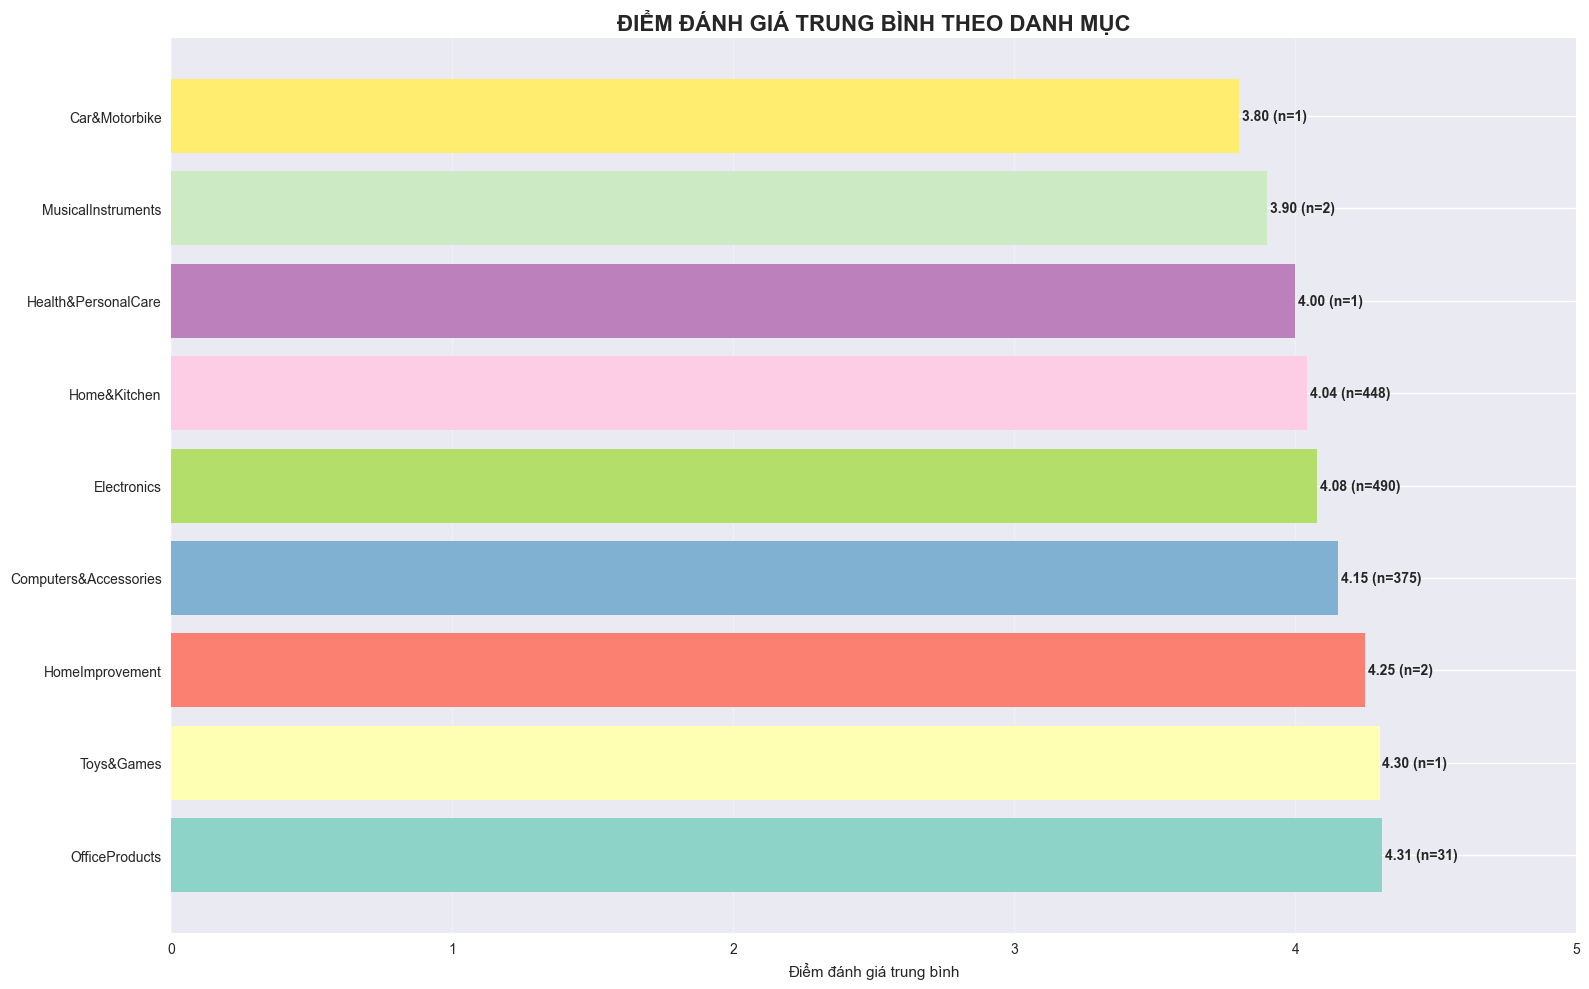

In [12]:
# Calculate average rating by category
avg_rating_by_category = df.groupby('category_main')['rating'].agg(['mean', 'count']).sort_values('mean', ascending=False)

plt.figure(figsize=(16, 10))

# Create bar plot
bars = plt.barh(avg_rating_by_category.index, avg_rating_by_category['mean'], 
                color=plt.cm.Set3(np.linspace(0, 1, len(avg_rating_by_category))))

# Add value annotations
for i, (mean, count) in enumerate(zip(avg_rating_by_category['mean'], avg_rating_by_category['count'])):
    plt.text(mean + 0.01, i, f'{mean:.2f} (n={count})', va='center', fontweight='bold')

plt.title('ĐIỂM ĐÁNH GIÁ TRUNG BÌNH THEO DANH MỤC', fontsize=16, fontweight='bold')
plt.xlabel('Điểm đánh giá trung bình')
plt.xlim(0, 5)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

**9. Đánh giá trung bình theo Danh mục**
- **Tất cả các danh mục đều có điểm đánh giá trung bình khá cao, trên 3.8/5.** Điều này một lần nữa khẳng định rằng bộ dữ liệu này chủ yếu bao gồm các sản phẩm được người tiêu dùng đánh giá tốt. Không có danh mục nào bị coi là "kém chất lượng" một cách tổng thể trong tập hợp này.
- **Cần thận trọng khi diễn giải điểm số của các danh mục có rất ít sản phẩm (n ≤ 2).** Các danh mục như `Toys&Games` (4.30 điểm, n=1) hay `HomeImprovement` (4.25 điểm, n=2) có điểm số rất cao, nhưng chúng chỉ dựa trên một hoặc hai sản phẩm. Do đó, điểm số này không phản ánh chất lượng chung của cả danh mục mà chỉ là chất lượng của những sản phẩm cụ thể đó trong bộ dữ liệu.
- **Trong số các danh mục có số lượng sản phẩm lớn và đáng tin cậy, 'Computers&Accessories' có độ hài lòng cao nhất.** Khi xem xét các nhóm có mẫu lớn (n > 30), `Computers&Accessories` dẫn đầu với 4.15 điểm, tiếp theo là `Electronics` (4.08 điểm) và `Home&Kitchen` (4.04 điểm). Điều này cho thấy rằng, trong bộ dữ liệu này, người mua có xu hướng hài lòng hơn một chút với các sản phẩm liên quan đến máy tính và phụ kiện so với các sản phẩm điện tử hoặc gia dụng nói chung.

<h2 align="center"><span style="color:#06445e;">3.4. Phân phối giá theo Độ phổ biến</span>

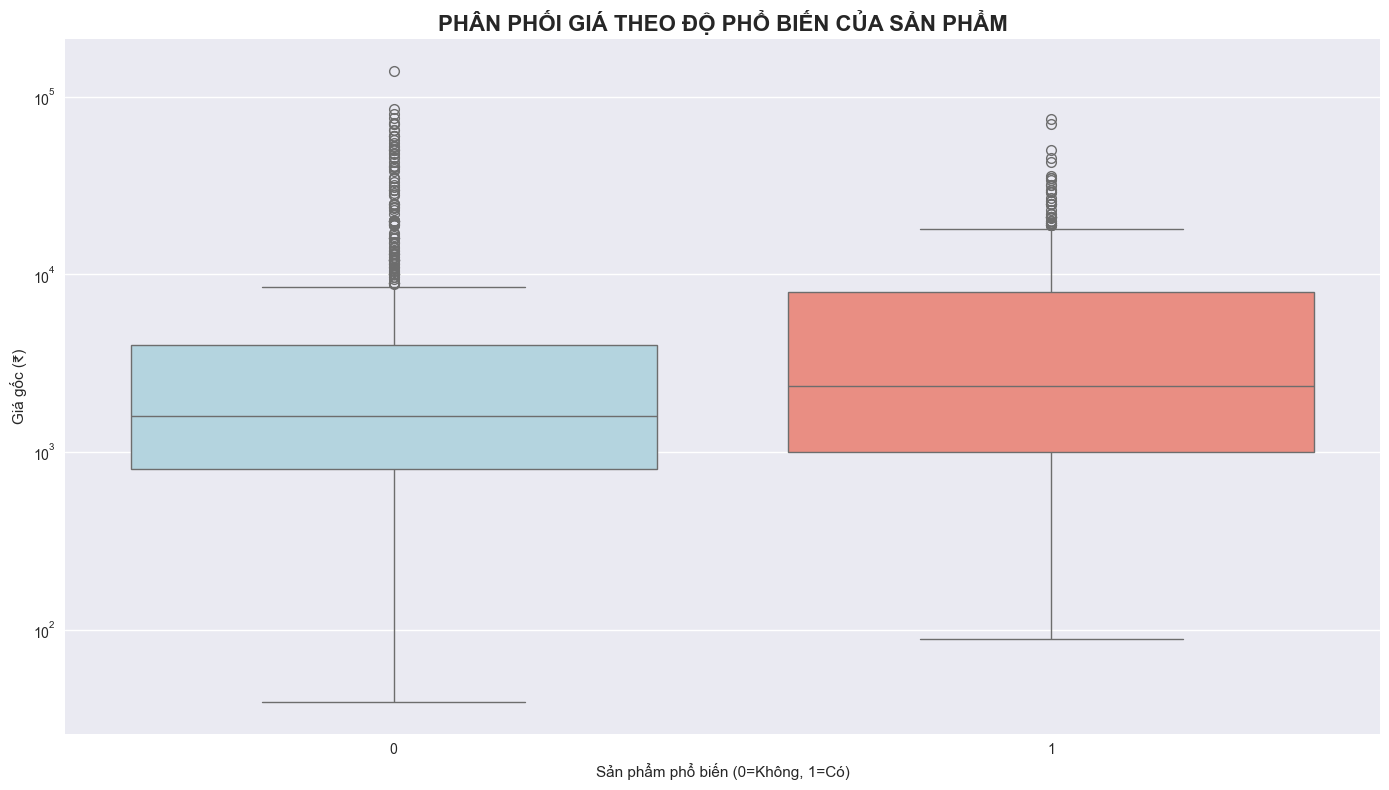

In [13]:
plt.figure(figsize=(14, 8))

# Create boxplot
sns.boxplot(data=df, x='is_popular', y='actual_price', palette=['lightblue', 'salmon'])

plt.title('PHÂN PHỐI GIÁ THEO ĐỘ PHỔ BIẾN CỦA SẢN PHẨM', fontsize=16, fontweight='bold')
plt.xlabel('Sản phẩm phổ biến (0=Không, 1=Có)')
plt.ylabel('Giá gốc (₹)')
plt.yscale('log')  # Log scale for better visualization

plt.tight_layout()
plt.show()

**10. PHÂN PHỐI GIÁ THEO ĐỘ PHỔ BIẾN CỦA SẢN PHẨM**

- **I. Sản phẩm phổ biến có giá trung vị cao hơn đáng kể:**  
Median của sản phẩm phổ biến (~4,000 ₫) cao hơn ~2 lần so với sản phẩm không phổ biến (~2,000 ₫). Toàn bộ phân phối của nhóm phổ biến **dịch chuyển sang phải**, cho thấy chiến lược ưu tiên quảng cáo cho các sản phẩm có giá trị cao hơn.

- **II. Sản phẩm phổ biến có khoảng giá rộng hơn nhiều:**  
IQR (Q3-Q1) của nhóm phổ biến (~6,500 ₫) lớn hơn ~60% so với nhóm không phổ biến (~4,000 ₫). Chiều cao hộp và whiskers của nhóm đỏ dài hơn rõ ràng, chứng tỏ rằng chiến lược quảng cáo **không chỉ tập trung vào một phân khúc giá cụ thể mà bao phủ cả thấp, trung bình, và cao cấp**.

- **III. Sản phẩm giá cao nhất hầu hết là sản phẩm phổ biến:**  
Trên log scale, nhóm phổ biến (đỏ) có **rất nhiều outliers nằm từ 10^5 đến 10^6 ₫**, trong khi nhóm không phổ biến (xanh) chỉ có vài outliers ở ~10^5. Các sản phẩm có giá > 100,000 ₫ **gần như toàn bộ thuộc nhóm phổ biến**, cho thấy mối tương quan chặt chẽ giữa giá cao và được quảng cáo/phổ biến.


<h1 align="center"><span style="color:#06445e;">4. PHÂN TÍCH NÂNG CAO</span>


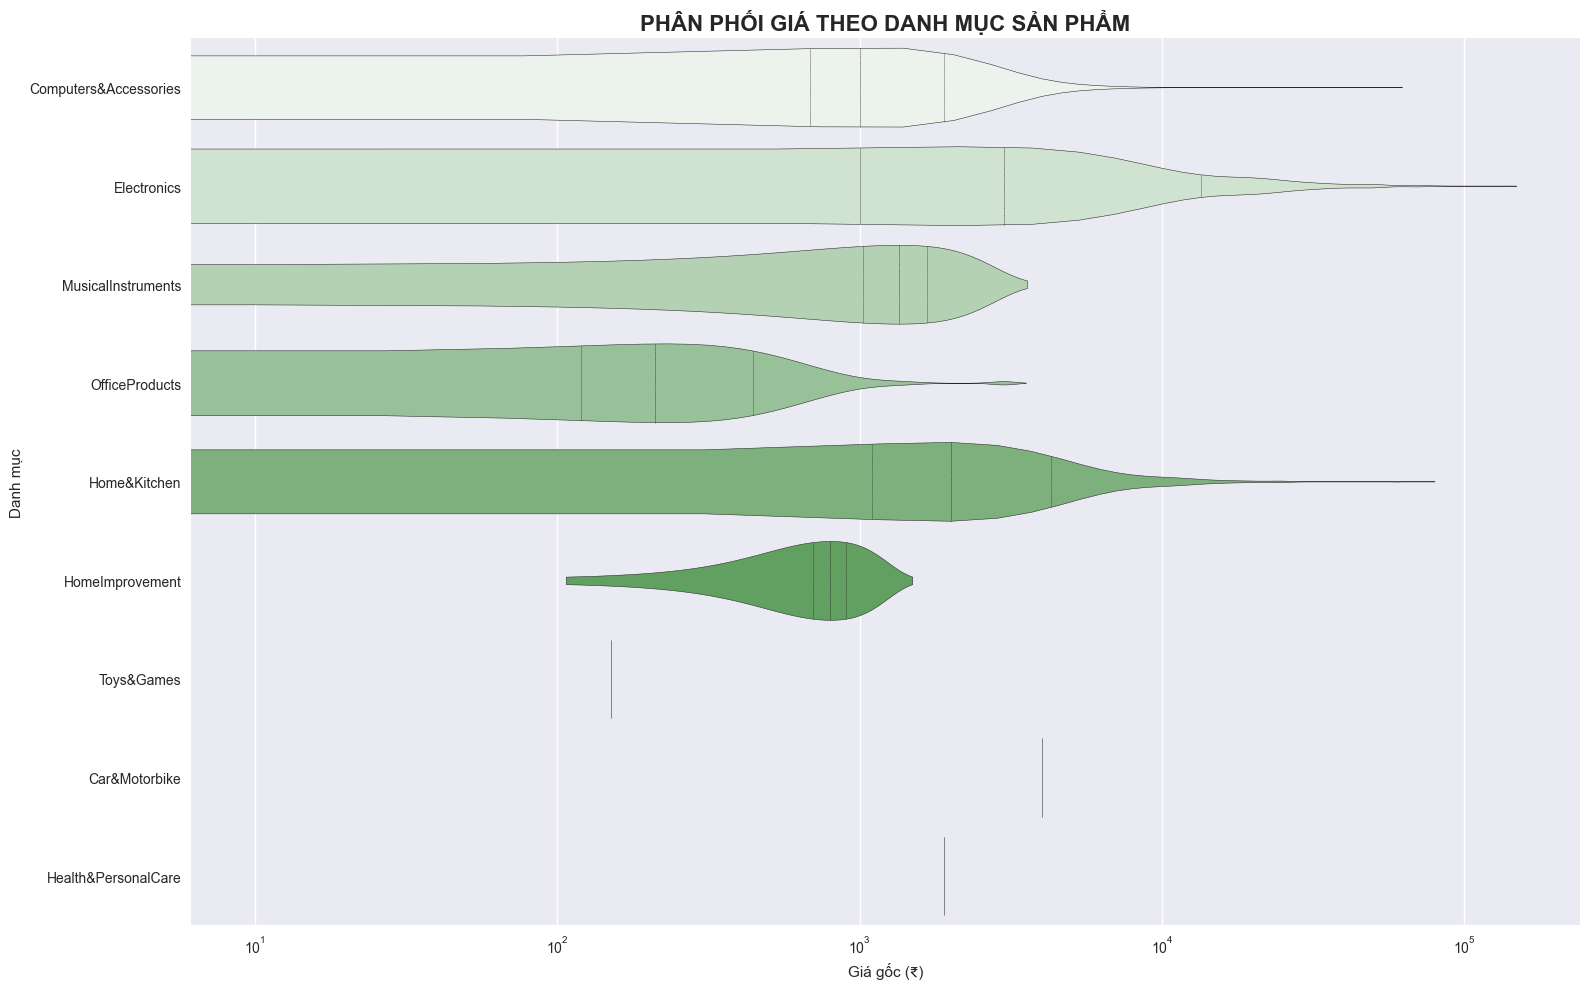

In [14]:
# Price range analysis by category
plt.figure(figsize=(16, 10))

# Create violin plot to show price distribution by category
sns.violinplot(data=df, y='category_main', x='actual_price', 
               palette='light:g', inner='quartile', scale='width')

plt.title('PHÂN PHỐI GIÁ THEO DANH MỤC SẢN PHẨM', fontsize=16, fontweight='bold')
plt.xlabel('Giá gốc (₹)')
plt.ylabel('Danh mục')
plt.xscale('log')

plt.tight_layout()
plt.show()

**11. Phân phối Giá theo Danh mục sản phẩm (Violin Plot)**
- **`Electronics` và `Computers&Accessories` có sự đa dạng về giá lớn nhất.** Hình dạng "violin" của hai danh mục này rất rộng và kéo dài, cho thấy chúng chứa đầy đủ các phân khúc sản phẩm, từ các phụ kiện giá rẻ đến các thiết bị cao cấp. Điều này phản ánh đúng bản chất của ngành hàng điện tử, nơi có sản phẩm cho mọi ngân sách.
- **Phần lớn sản phẩm trong các danh mục lớn đều tập trung ở phân khúc giá thấp đến trung bình.** Dù `Electronics` có các sản phẩm rất đắt, nhưng phần "thân" của violin dày nhất lại nằm ở khu vực giá thấp hơn. Điều này cho thấy trong bộ dữ liệu này, các sản phẩm phổ biến và được liệt kê nhiều nhất vẫn là những mặt hàng dễ tiếp cận, không phải là các sản phẩm đắt tiền.
- **`OfficeProducts` có phân phối giá hẹp và tập trung ở mức thấp nhất.** Hình violin của danh mục này nhỏ và nằm gần về phía trục tung, cho thấy các sản phẩm văn phòng phẩm trong bộ dữ liệu chủ yếu là các mặt hàng giá rẻ như bút, giấy, hoặc phụ kiện nhỏ.
- **Các danh mục có ít sản phẩm (`Toys&Games`, `Health&PersonalCare`,...) gần như không có phân phối.** Hình violin của chúng rất mỏng, gần như là một đường thẳng. Điều này xác nhận một lần nữa rằng mẫu dữ liệu cho các danh mục này quá nhỏ, không thể rút ra bất kỳ kết luận nào có ý nghĩa về sự phân bố giá của chúng.

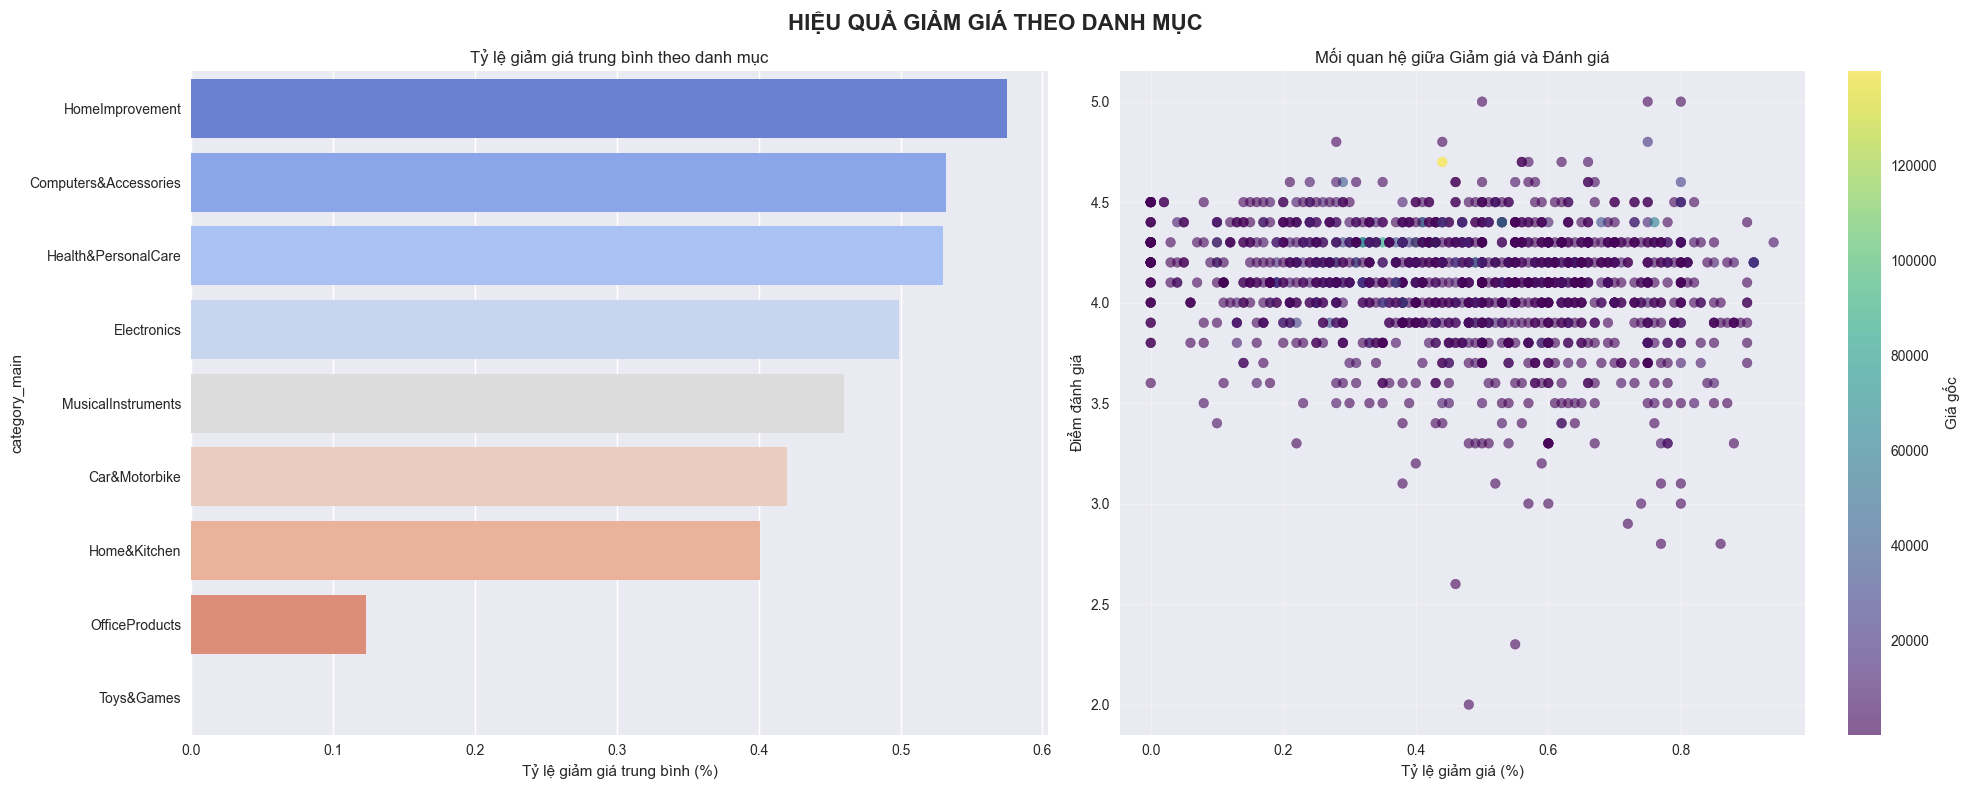

In [15]:
# Discount effectiveness analysis
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('HIỆU QUẢ GIẢM GIÁ THEO DANH MỤC', fontsize=16, fontweight='bold')

# Average discount by category
discount_by_category = df.groupby('category_main')['discount_percentage'].mean().sort_values(ascending=False)
sns.barplot(x=discount_by_category.values, y=discount_by_category.index, ax=axes[0], palette='coolwarm')
axes[0].set_title('Tỷ lệ giảm giá trung bình theo danh mục')
axes[0].set_xlabel('Tỷ lệ giảm giá trung bình (%)')

# Rating vs discount percentage
scatter = axes[1].scatter(df['discount_percentage'], df['rating'], 
                         c=df['actual_price'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, ax=axes[1], label='Giá gốc')
axes[1].set_title('Mối quan hệ giữa Giảm giá và Đánh giá')
axes[1].set_xlabel('Tỷ lệ giảm giá (%)')
axes[1].set_ylabel('Điểm đánh giá')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**12. Tỷ lệ giảm giá trung bình theo Danh mục**
- **`HomeImprovement` và `Computers&Accessories` là hai danh mục có tỷ lệ giảm giá trung bình cao nhất.** Điều này cho thấy các nhà bán hàng trong bộ dữ liệu này sử dụng giảm giá như một công cụ cạnh tranh rất mạnh mẽ trong hai lĩnh vực này. Đối với `Computers&Accessories`, điều này có thể là để kích cầu mua sắm các sản phẩm công nghệ, trong khi `HomeImprovement` (dù mẫu nhỏ) có thể đang dùng giảm giá để thu hút khách hàng thử các sản phẩm mới.
- **Tỷ lệ giảm giá không đồng đều giữa các danh mục.** Có sự khác biệt rõ rệt về chiến lược giảm giá giữa các nhóm hàng. Ví dụ, một số danh mục có thể tập trung vào giá trị thay vì giảm giá sâu, trong khi các danh mục khác lại coi đây là chiến lược chính. Điều này cho thấy mỗi ngành hàng có một động lực thị trường và hành vi người mua khác nhau trong bộ dữ liệu này.
- **Cần cẩn trọng khi diễn giải tỷ lệ giảm giá của các danh mục có ít sản phẩm.** Tương tự như điểm đánh giá, tỷ lệ giảm giá của các danh mục như `HomeImprovement` có thể bị ảnh hưởng mạnh bởi một hoặc hai sản phẩm có mức giảm giá đặc biệt lớn, và không phản ánh chính xác xu hướng chung của toàn bộ ngành hàng.

**13. Mối quan hệ giữa Giá đã giảm và Điểm đánh giá**
- **Giá đã giảm không có mối quan hệ rõ ràng với điểm đánh giá.** Tương tự như giá gốc, biểu đồ phân tán này cho thấy một đám mây điểm dày đặc, không tạo thành một đường xu hướng tăng hay giảm. Điều này có nghĩa là, trong bộ dữ liệu này, một sản phẩm được giảm giá sâu không tự động nhận được đánh giá cao hơn. Người mua vẫn đánh giá dựa trên chất lượng và sự hài lòng thực tế, bất kể họ đã trả bao nhiêu tiền sau khi giảm giá.
- **Các sản phẩm ở mọi mức giá (đã giảm) đều có thể đạt được điểm đánh giá cao.** Các chấm màu vàng (giá cao) và màu tím (giá thấp) đều phân bố dày đặc ở khu vực điểm đánh giá từ 4.0 trở lên. Điều này củng cố thêm rằng "giá trị" (chất lượng so với giá tiền) mới là yếu tố quan trọng đối với người mua trong bộ dữ liệu này, chứ không phải là giá tuyệt đối.
- **Sự tập trung của dữ liệu vẫn nằm ở khu vực giá thấp và đánh giá tốt.** Phần lớn các chấm tập trung ở góc dưới bên trái của biểu đồ (giá đã giảm thấp, điểm đánh giá cao). Đây là một lần nữa khẳng định "điểm ngọt" của bộ dữ liệu: các sản phẩm giá cả phải chăng, được giảm giá tốt và mang lại sự hài lòng cao cho người mua.

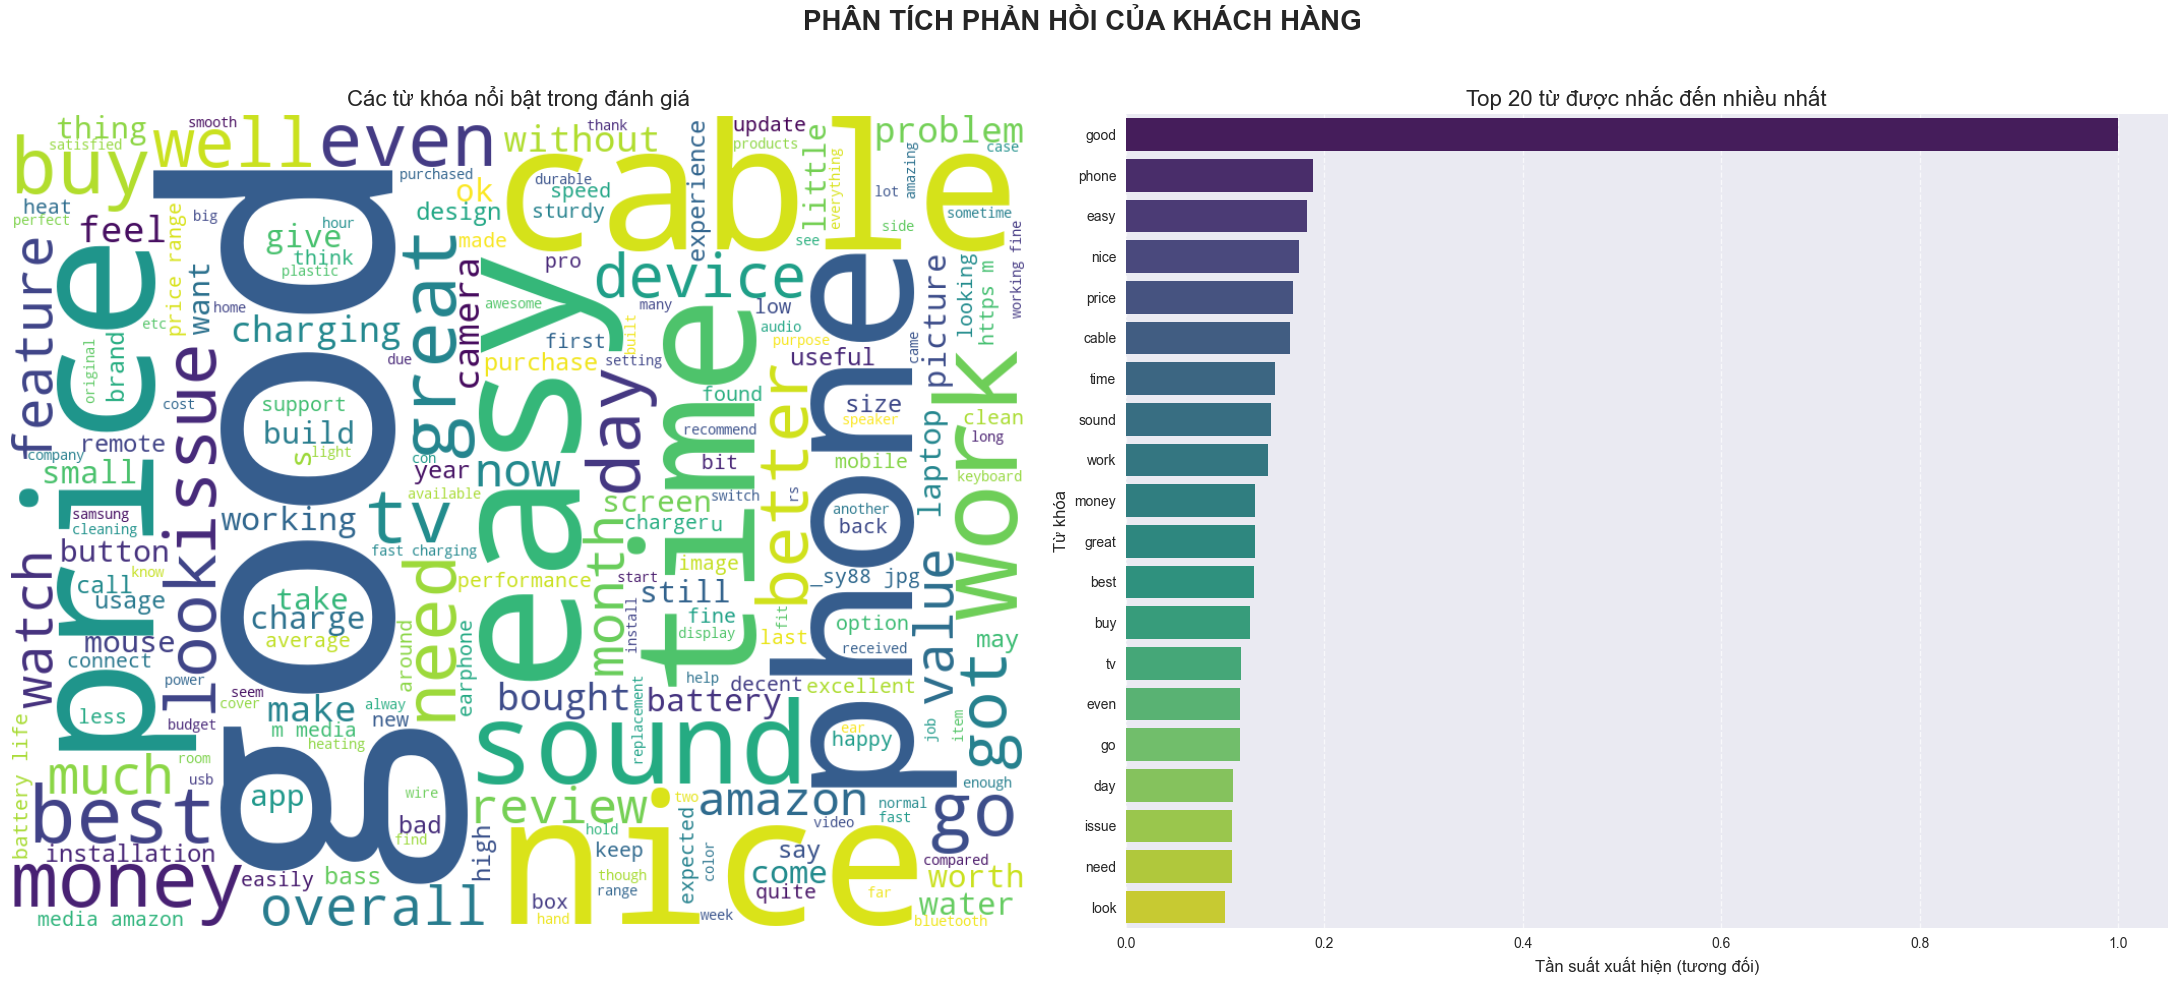

In [16]:
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

text_data = df['review_content'].dropna().astype(str)
all_text = " ".join(review for review in text_data.str.lower())

custom_stopwords = ['product', 'quality', 'use', 'one', 'will', 'using', 'used', 'br', 'get', 'also', 'would', 'really','qua']

stopwords = set(STOPWORDS)
stopwords.update(custom_stopwords)
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
fig.suptitle('PHÂN TÍCH PHẢN HỒI CỦA KHÁCH HÀNG', fontsize=20, fontweight='bold')

wordcloud = WordCloud(
    stopwords=stopwords,
    background_color='white',
    width=1000,
    height=800,
    colormap='viridis', 
    max_words=200,      
    collocations=True   
).generate(all_text)

axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].set_title('Các từ khóa nổi bật trong đánh giá', fontsize=16)
axes[0].axis('off')  

top_words = list(wordcloud.words_.keys())[:20] 
top_counts = [wordcloud.words_[word] for word in top_words]

sns.barplot(x=top_counts, y=top_words, ax=axes[1], palette='viridis')
axes[1].set_title('Top 20 từ được nhắc đến nhiều nhất', fontsize=16)
axes[1].set_xlabel('Tần suất xuất hiện (tương đối)', fontsize=12)
axes[1].set_ylabel('Từ khóa', fontsize=12)
axes[1].grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**14. Phân tích Phản hồi của Khách hàng (Word Clouds)**
- **Khách hàng tập trung vào các yếu tố thực tế và tính năng cốt lõi.** Các từ khóa có tần suất xuất hiện cao nhất là "phone", "product", "quality", "price", "easy", "use". Điều này cho thấy trong bộ dữ liệu này, người mua đánh giá sản phẩm dựa trên các tiêu chí rõ ràng: sản phẩm là gì, chất lượng ra sao, giá cả thế nào và có dễ sử dụng không, thay vì các cảm xúc mơ hồ.
- **Bộ dữ liệu này bị chi phối mạnh mẽ bởi các sản phẩm liên quan đến điện thoại.** Từ "phone" có kích thước rất lớn và đứng ở vị trí cao trong cả hai biểu đồ, cùng với các từ liên quan như "charging", "cable", "sound". Điều này khẳng định rằng các phản hồi chủ yếu phản ánh cảm nhận và trải nghiệm của người dùng đối với thị trường điện thoại di động và phụ kiện.
- **Xu hướng chung của các phản hồi là tích cực và hài lòng.** Từ "good" là từ được lặp lại nhiều nhất một cách áp đảo, vượt trội hơn cả các từ chung chung như "product". Từ "nice" cũng xuất hiện với tần suất đáng kể. Đây là một chỉ báo rất mạnh mẽ cho thấy phần lớn các đánh giá trong bộ dữ liệu này mang lại sự hài lòng cho người mua.

<h1 align="center"><span style="color:#06445e;">TÓM TẮT VÀ KẾT LUẬN</span>

>Bộ dữ liệu này vẽ nên một bức tranh về một thị trường trực tuyến năng động, nơi chất lượng sản phẩm được cảm nhận rất cao và các chiến lược định giá, đặc biệt là giảm giá, đóng vai trò trung tâm.

>Điểm nổi bật nhất là sự hài lòng áp đảo của khách hàng, với hầu hết các sản phẩm đạt điểm đánh giá tốt đến xuất sắc. Quan trọng hơn, sự hài lòng này dường như độc lập với giá cả. Người mua không mặc định "đắt hơn là tốt hơn", cho thấy họ tập trung vào giá trị thực tế mà sản phẩm mang lại, bất kể giá niêm yết hay giá sau khi giảm giá.

>Phân tích sâu hơn đã chỉ ra một "điểm ngọt" (sweet spot) rõ ràng cho sự phổ biến: các sản phẩm ở phân khúc giá tầm trung, được giảm giá sâu và có điểm đánh giá cao, là những sản phẩm thu hút lượng đánh giá lớn nhất. Đây là những sản phẩm cân bằng được giữa chất lượng và giá cả, tạo ra sức hút lớn nhất đối với người mua trong tập dữ liệu này. Các chiến lược quảng cáo (sponsored) cũng có xu hướng tập trung vào các sản phẩm giá trị cao hơn, cho thấy sự đầu tư có chọn lọc.

>Tuy nhiên, toàn bộ bức tranh này bị chi phối mạnh mẽ bởi một vài danh mục sản phẩm chính, đặc biệt là **Electronics**, **Home&Kitchen**, và **Computers&Accessories**. Do đó, các kết luận này chỉ mang tính đại diện cho các ngành hàng này trong bộ dữ liệu. Các nhận định về các danh mục khác cần được xem xét cẩn trọng do kích thước mẫu quá nhỏ.

>Tóm lại, bộ dữ liệu nhỏ này cho thấy một hệ sinh thái sản phẩm thành công, nơi niềm tin của người mua được xây dựng trên chất lượng cao được đánh giá đồng đều, và các nhà bán hàng cạnh tranh chủ yếu thông qua các chương trình giảm giá hấp dẫn để thu hút sự chú ý trong các danh mục lớn.